# Activity 1

What post secondary instituations are in your hometown or state? How many schools have the word College in their name rather than University? What is the number of all female secondary institutions compared to the number of all male secondary institutions?

In [2]:
def wget(remote, local):
    
    result = requests.get(remote)
    
    with open(local, 'w') as fh:
        fh.write(result.content)

In [3]:
url = 'https://s3.amazonaws.com/ed-college-choice-public/Most+Recent+Cohorts+(Scorecard+Elements).csv'
wget(url, 'scorecard.csv')

What is your hometown? Seattle
The following 24 secondary institutions are in Seattle:
Golden Gate University-Seattle
The Art Institute of Seattle
City University of Seattle
Cornish College of the Arts
Divers Institute of Technology
ITT Technical Institute-Seattle
Seattle Community College-North Campus
Seattle Community College-South Campus
Seattle Central College
Everest College-Seattle
Seattle Pacific University
Seattle University
University of Washington-Seattle Campus
Antioch University-Seattle
Pima Medical Institute-Seattle
Seattle Vocational Institute
Cortiva Institute-Seattle
Bakke Graduate University
Argosy University-Seattle
Seattle Institute of Oriental Medicine
The Seattle School of Theology & Psychology
Gary Manuel Aveda Institute
Bainbridge Graduate Institute
Academy of Interactive Entertainment


([<matplotlib.axis.XTick at 0x10c571e50>,
 <a list of 5 Text xticklabel objects>)

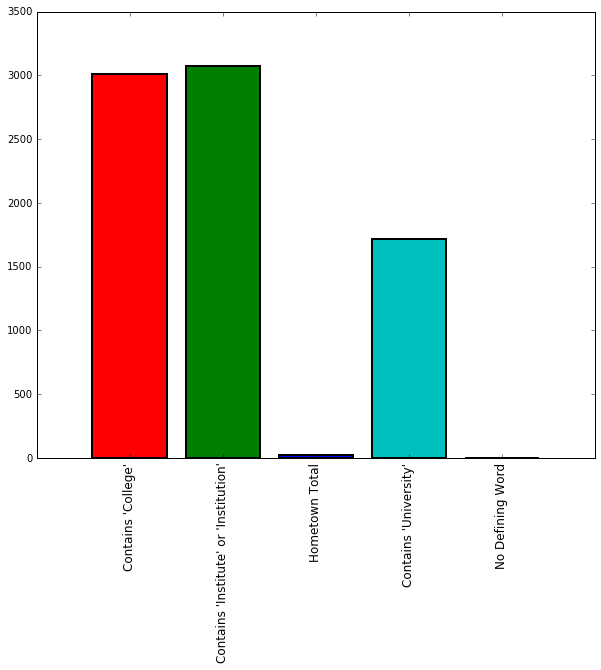

In [3]:
import csv

with open('scorecard.csv') as fh:
    reader = csv.DictReader(fh)
    
    colleges         = []
    universities     = []
    institutes       = []
    other            = []
    hometown_list    = []
    hometown         = raw_input('What is your hometown? ').lower()
    
    for record in reader:
        name = record['INSTNM']
        if 'university' in name.lower():
            universities.append(name)
        elif 'college' in name.lower():
            colleges.append(name)
        elif 'institute' or 'institution' in name.lower():
            institutes.append(name)
        else:
            other.append(name)
        city = record['CITY']
        if hometown in city.lower():
            hometown_list.append(name)

print 'The following {} secondary institutions are in {}:' .format(len(hometown_list), hometown.title())            
print "\n".join(hometown_list)
                
total = {
    "Contains 'College'" : len(colleges),
    "Contains 'University'" : len(universities),
    "Contains 'Institute' or 'Institution'" : len(institutes),
    "No Defining Word" : len(other),
    "Hometown Total" : len(hometown_list)
        }
keys   = total.keys()
count = total.values()
            
import matplotlib.pyplot as plt
%matplotlib inline
    
plt.figure(figsize=(10, 8))
plt.bar(range(len(keys)), count, linewidth=2, align='center', color='rgbcymk')
plt.xticks(range(len(keys)), keys, fontsize=12, rotation='vertical')

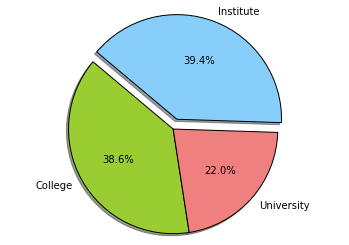

In [5]:
labels = 'College', 'University', 'Institute'
sizes = [len(colleges), len(universities), len(institutes)]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1)  
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

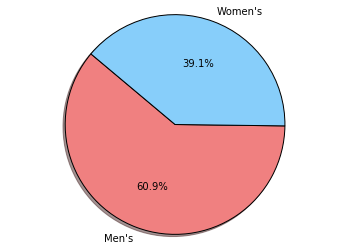

In [59]:
import csv

with open('scorecard.csv') as fh:
    reader = csv.DictReader(fh)
    
    mens   = []
    womens = []
    total  = 0
    
    for record in reader:
        name = record['INSTNM']
        try: 
            if int(record['MENONLY']) == 1:
                mens.append(name)
            if int(record['WOMENONLY']) == 1:
                womens.append(name)
        except ValueError:
            pass

labels = "Men's", "Women's"
sizes = [len(mens), len(womens)]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

### Questions

1) Describe the dataset you explored and the two questions you investigated.

I explored the college scorecard dataset in order to find the school that were from my hometown and to compare the number of schools that contain the words college, institute or institution, and university. I also decided to compare the percentage of women's colleges to men's colleges using the college scorecard as well. This actually yielded some very interesting results because I definitely thought there weren't really many, if any, all male secondary institutions left, but there are actually more than there are all female secondary institutions.

2) For each question, explain how you used code to manipulate the data in order to explore the dataset and answer your questions, and discuss the answer you came up with based on your exploration.

First I opened a new file in write mode so that I put the data from the college scorecard into it. Then I parsed through that data and used the correct wording to call up the data that I wanted to look at. For example, to look at the name of the school, ['INSTNM']. Then I created lists and sorted the schools into those lists based on qualifications I was looking for. Then I created a dictionary that had keys stating the number that they were paired with, and a number that was the length of one of the previous lists. Using this dictionary, I created a bar graph with the keys as the labels, and the values as the amount in each bar. For women's colleges vs men's colleges, I created a pie chart using lists that I had created while parsing through the data. I also then went back into my data that I made a bar graph for and created a pie chart as well.

3) What challenges did you face and how did you overcome these obstables? What sort of questions were difficult to ask?

One challenge that I faced was trying to figure out how to make my seperate lists into a plot. Eventually, I figured that it was easier just to use create a new dictionary for my data. I was also unsure as to how exactly to create a pie chart, but I was able to just look it up and find a basic formula.

# Activity 2

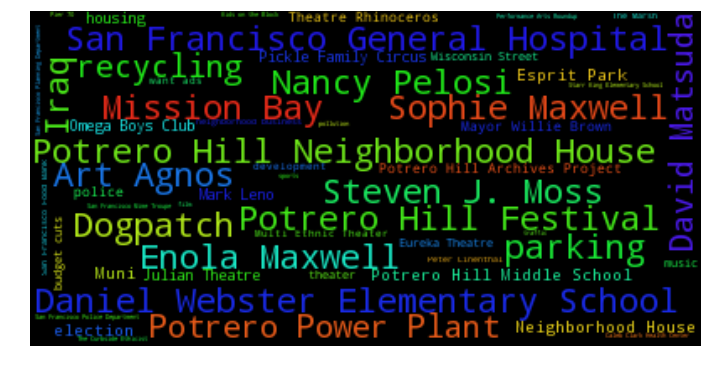

In [199]:
%matplotlib inline

import csv
import requests
import wordcloud
import matplotlib.pyplot as plt


def collection_url(collection):
    url = 'https://archive.org/advancedsearch.php?q={}&rows=1000&output=json' .format(collection)
    return url

def count_subjects(url, blocklist): 
    r = requests.get(url)
    data = r.json()
    subjects = {}
    
    for new in data['response']['docs']:
        try:
            subject = new['subject']
        except KeyError:
            pass
        for sub in subject:
            s = sub.encode('utf-8')
            if s.lower() not in set(blocklist):
                subjects[str(s)] = subjects.get(str(s), 0) + 1
    return subjects

def save_subjects(subjects, path):
    with open(path, 'w') as csvfile:
        header = ['Subject', 'Count']
        writer = csv.DictWriter(csvfile, delimiter = ',', fieldnames=header)
        writer.writeheader()
        for key, value in subjects.items():
            writer.writerow({'Subject' : key, 'Count' : value})
    return csvfile

def make_subjects_wordcloud(subjects):
    ''' Generate Word Cloud of Subjects Frequencies '''
    wc = wordcloud.WordCloud().generate_from_frequencies(subjects.items())

    plt.figure(figsize=(12, 9))
    plt.imshow(wc)
    plt.axis('off')



PAPER_NAME      = 'potreroview'
PAPER_URL       =  collection_url(PAPER_NAME)
PAPER_BLOCKLIST = [
  'library',
  'ten years ago',
  'classifieds',
  'arts & entertainment',
  'classified ads',
  'quickview',
  'crime',
  'art',
  'history',
]
PAPER_SUBJECTS  = count_subjects(PAPER_URL, PAPER_BLOCKLIST)

save_subjects(PAPER_SUBJECTS, PAPER_NAME + '.csv')
make_subjects_wordcloud(PAPER_SUBJECTS)

### Questions

1) Describe the contents of the Internet Archive's collection JSON data. How did you extract the list of documents associated with each collection?

I used r = requests.get(url)and then data = r.json() to extract the JSON data. Then I systematically made my way through the data using data.keys() and picking a key to follow. If it led me to a list then I would use a for loop to make my way through that list and choose something else to follow. By doing this, I was able to make my way through the data until I found what I was looking for, subjects. Then I condensed the trail I had used into two key requests for data, a for loop, and then another key request. This then gave me the list of subjects that I was looking for. 

2) How did you process each subject in each document? Describe how you built the subjects frequency table.

To process the subject from each document I created a list of subjects, then parsed through that list using a for loop to check if each subject was in the blocklist. If it was not in the blocklist, then I added it to a dictionary by using the function d.get(). I created a default of 0 so that if the subject was not already in the dictionary, then it would be added. Then I added one to the number value associated with that subject (key) so that each subject would be keeping a count of how many times it occurred.

3) Use your code to generate a WordCloud for each newspaper. Tweak each WordCloud by creating a blocklist of uninteresting terms for each newspaper (as shown in the example above). Did you find anything interesting about the subjects in the newspapers?

All the newspapers had lots of groups of words using the name of the town. There were also a lot of word groups that were names. Poetry was also pretty popular as was library.

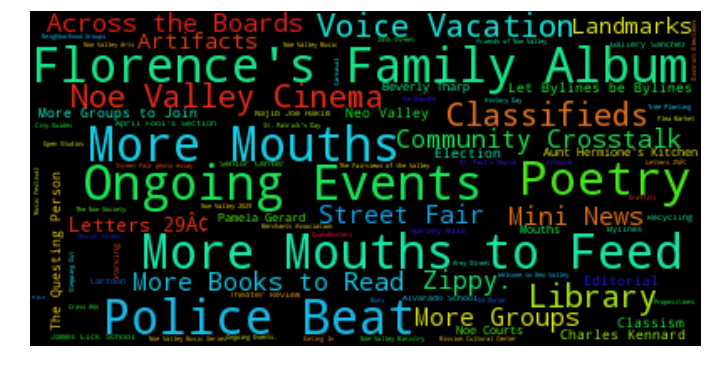

In [158]:
PAPER_NAME      = 'noevalleyvoice'
PAPER_URL       =  collection_url(PAPER_NAME)
PAPER_BLOCKLIST = [
  'calendar',
  'class ads',
  'rumors',
  'short takes',
  'letters',
  'storetrek',
  'more books',
  'zippy',
  'books',
]
PAPER_SUBJECTS  = count_subjects(PAPER_URL, PAPER_BLOCKLIST)

save_subjects(PAPER_SUBJECTS, PAPER_NAME + '.csv')
make_subjects_wordcloud(PAPER_SUBJECTS)

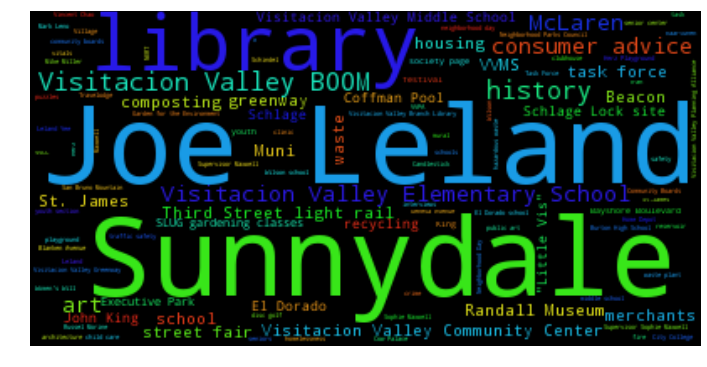

In [161]:
PAPER_NAME      = 'visitacionvalleygrapevine'
PAPER_URL       =  collection_url(PAPER_NAME)
PAPER_BLOCKLIST = [
  'leland avenue',
  'police',
  'little hollywood',
  'visitacion valley history project',
  'mayor gavin newsom',
  'business directory',
  'vves',
  'geneva towers',
  'mclaren park',
]
PAPER_SUBJECTS  = count_subjects(PAPER_URL, PAPER_BLOCKLIST)

save_subjects(PAPER_SUBJECTS, PAPER_NAME + '.csv')
make_subjects_wordcloud(PAPER_SUBJECTS)

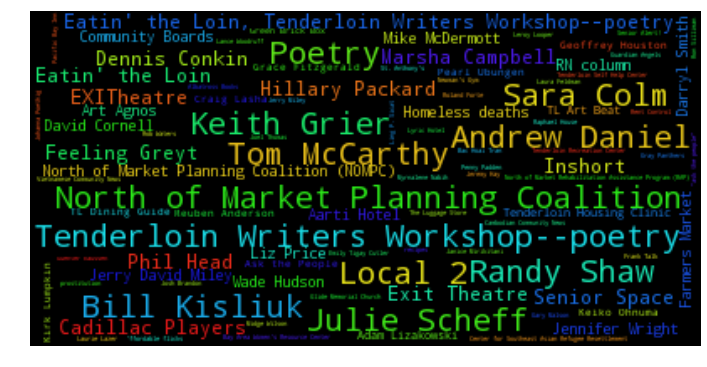

In [170]:
PAPER_NAME      = 'tenderlointimes'
PAPER_URL       =  collection_url(PAPER_NAME)
PAPER_BLOCKLIST = [
  'calendar',
  'the tenderside',
  'house log',
  'tenderloin writers workshop',
  "tenderloin writers' workshop: poetry",
  'janice king',
  'hotplate gourmet',
  '509 cultural center',
  'janice king',
]
PAPER_SUBJECTS  = count_subjects(PAPER_URL, PAPER_BLOCKLIST)

save_subjects(PAPER_SUBJECTS, PAPER_NAME + '.csv')
make_subjects_wordcloud(PAPER_SUBJECTS)

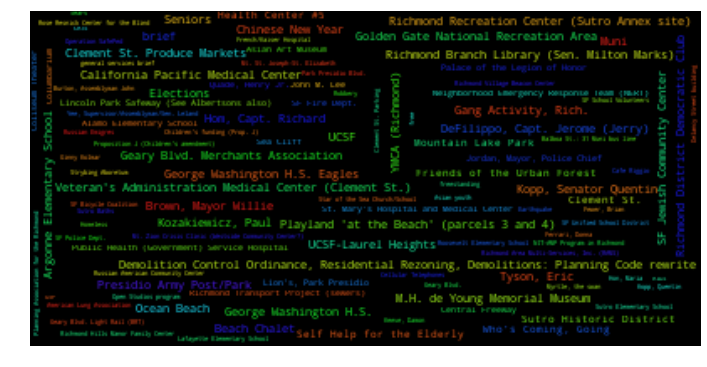

In [172]:
PAPER_NAME      = 'richmondreview'
PAPER_URL       =  collection_url(PAPER_NAME)
PAPER_BLOCKLIST = [
  'lee, john m.',
  'richmond police (station)',
  'golden gate park',
  'perrigan, dana',
  'kolmar, ginny',
  'history',
  'assmann, david',
  'letters to the editor',
  'jacoby/chatham, laura',
  'jordan, mayor frank',
]
PAPER_SUBJECTS  = count_subjects(PAPER_URL, PAPER_BLOCKLIST)

save_subjects(PAPER_SUBJECTS, PAPER_NAME + '.csv')
make_subjects_wordcloud(PAPER_SUBJECTS)

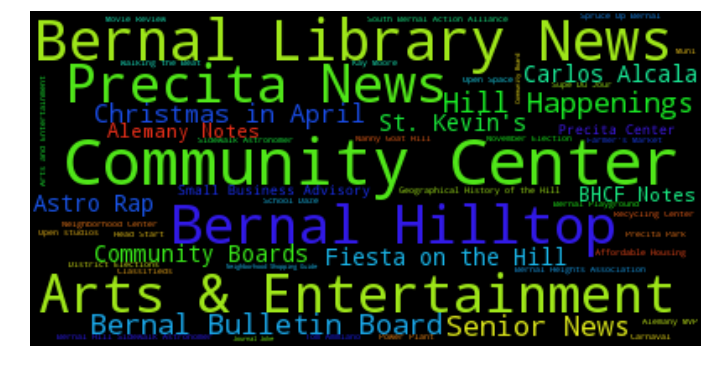

In [173]:
PAPER_NAME      = 'bernalpapers'
PAPER_URL       =  collection_url(PAPER_NAME)
PAPER_BLOCKLIST = [
  'bernal library',
  'astro-rap',
  'to the editor',
  'library',
  'natural history',
  'recycling',
  'lurilla harris',
  'community congress',
  'street fair',
]
PAPER_SUBJECTS  = count_subjects(PAPER_URL, PAPER_BLOCKLIST)

save_subjects(PAPER_SUBJECTS, PAPER_NAME + '.csv')
make_subjects_wordcloud(PAPER_SUBJECTS)

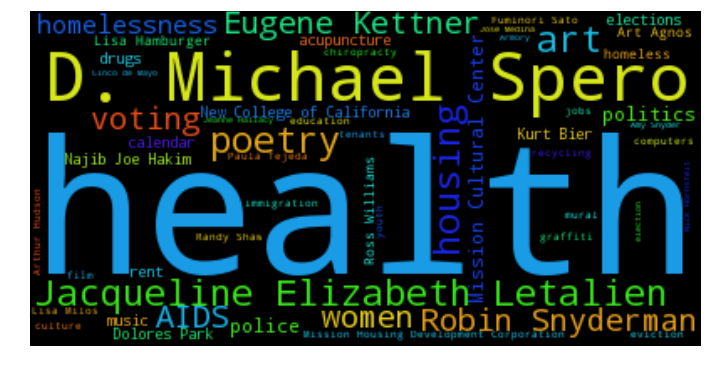

In [174]:
PAPER_NAME      = 'northmissionnews'
PAPER_URL       =  collection_url(PAPER_NAME)
PAPER_BLOCKLIST = [
  'victor miller',
  'robert leaver',
  'world music',
  'brian doohan',
  'frank deadbeat',
  'andy solow',
  'gangs',
  'carnaval',
  'crime',
]
PAPER_SUBJECTS  = count_subjects(PAPER_URL, PAPER_BLOCKLIST)

save_subjects(PAPER_SUBJECTS, PAPER_NAME + '.csv')
make_subjects_wordcloud(PAPER_SUBJECTS)

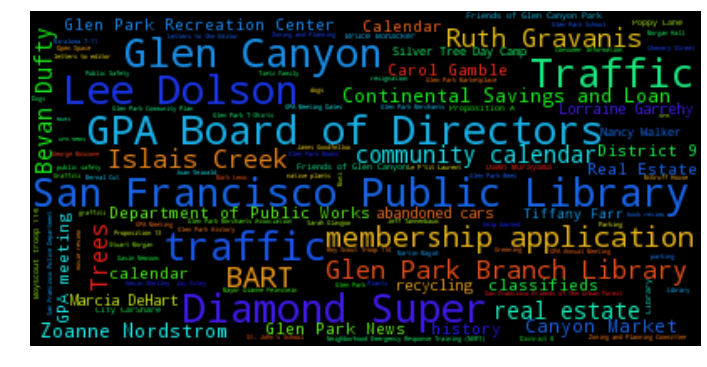

In [175]:
PAPER_NAME      = 'glenparkpapers'
PAPER_URL       =  collection_url(PAPER_NAME)
PAPER_BLOCKLIST = [
  'glen park library',
  'glen canyon park',
  'glen park association',
  'crime',
  'gpa board roster',
  'glen park garden club',
  'glen park festival',
  'jean conner',
]
PAPER_SUBJECTS  = count_subjects(PAPER_URL, PAPER_BLOCKLIST)

save_subjects(PAPER_SUBJECTS, PAPER_NAME + '.csv')
make_subjects_wordcloud(PAPER_SUBJECTS)